<a href="https://colab.research.google.com/github/mehmetsiddik/Generalized-Gaussian-Distribution/blob/main/2_Figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/fuzzy_operator_vs_true_set2_clean.png'

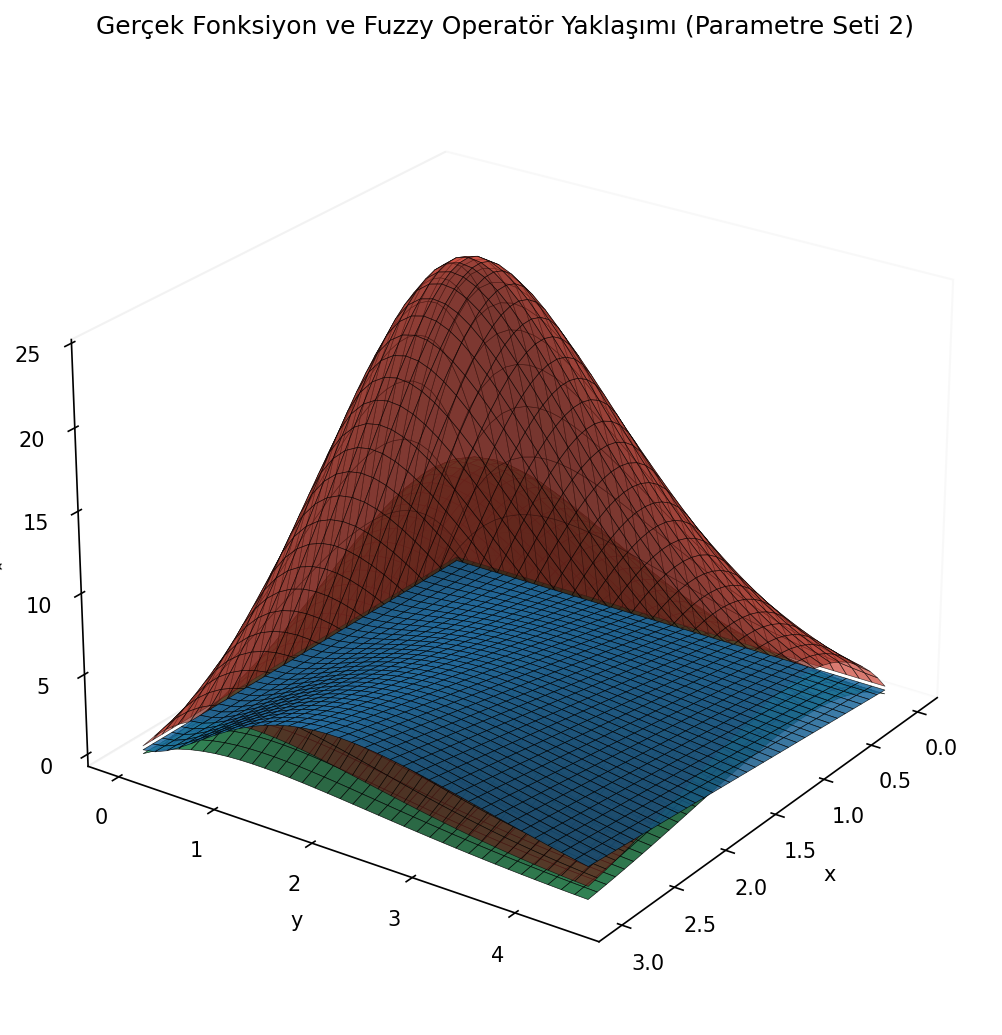

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# ---------- Kullanıcının verdiği fonksiyonlar ----------
def f_true(x, y):
    return 3.0 * x * (y**2) * math.exp(-y)

def h_lower(x, y):
    return 2.0 * x * y * math.exp(-y)

def h_upper(x, y):
    return 4.0 * x * y * math.exp(-y)

def pq_int(n, p, q):
    return (p**n - q**n) / (p - q)

def pq_binom(n, k, p, q):
    num = 1.0
    den = 1.0
    for i in range(1, k+1):
        num *= (p**(n-i+1) - q**(n-i+1))
        den *= (p**i - q**i)
    return num / den

def Phi(n, k, p, q, x, alpha_n):
    x_over_a = x / alpha_n
    prod = 1.0
    for s in range(n-k):
        prod *= (p**s - q**s * x_over_a)
    return (p**((k*(k-1) - n*(n-1))/2.0)) * pq_binom(n, k, p, q) * (x_over_a**k) * prod

def nodes_1d(n, p, q, alpha_n):
    denom = pq_int(n, p, q)
    return np.array([(pq_int(k, p, q)/denom) * (p**(k-n)) * alpha_n for k in range(n+1)])

def C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, x, y, h):
    xs = nodes_1d(n, p1, q1, alpha_n)
    ys = nodes_1d(m, p2, q2, beta_m)
    phi_x = np.array([Phi(n, k, p1, q1, x, alpha_n) for k in range(n+1)])
    phi_y = np.array([Phi(m, j, p2, q2, y, beta_m) for j in range(m+1)])
    total = 0.0
    for k in range(n+1):
        for j in range(m+1):
            total += h(xs[k], ys[j]) * phi_x[k] * phi_y[j]
    return total

# ---------- Parametre seti 2 ----------
n = m = 20
p1, q1 = 0.90, 0.86
p2, q2 = 0.996, 0.89
alpha_n = math.log(n)
beta_m  = math.sqrt(m)

Nx = Ny = 36
xs = np.linspace(0.0, alpha_n, Nx)
ys = np.linspace(0.0, beta_m, Ny)
X, Y = np.meshgrid(xs, ys)

# Yüzeyler
Z_true = np.vectorize(f_true)(X, Y)
Z_op_lower = np.zeros_like(X, dtype=float)
Z_op_upper = np.zeros_like(X, dtype=float)

for i in range(Ny):
    for j in range(Nx):
        Z_op_lower[i, j] = C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, X[i, j], Y[i, j], h_lower)
        Z_op_upper[i, j] = C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, X[i, j], Y[i, j], h_upper)

# ---------- Görselleştirme: grid kapalı + paneller şeffaf + canlı renkler ----------
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# Küçük offset (üst üste binmeyi azaltmak için)
z_min = float(np.nanmin([Z_true, Z_op_lower, Z_op_upper]))
z_max = float(np.nanmax([Z_true, Z_op_lower, Z_op_upper]))
eps = 0.01 * (z_max - z_min) if z_max > z_min else 1e-6

# Renkler
c_true  = "#1f77b4"  # mavi
c_lower = "#2ecc71"  # yeşil
c_upper = "#e74c3c"  # kırmızı

# Yüzeyler
surf_true = ax.plot_surface(X, Y, Z_true, color=c_true, alpha=0.85, linewidth=0.3, edgecolor="k", antialiased=True)
surf_low  = ax.plot_surface(X, Y, Z_op_lower - eps, color=c_lower, alpha=0.90, linewidth=0.3, edgecolor="k", antialiased=True)
surf_up   = ax.plot_surface(X, Y, Z_op_upper + eps, color=c_upper, alpha=0.70, linewidth=0.3, edgecolor="k", antialiased=True)

# Etiketler ve başlık
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('Değer', fontsize=10)
ax.set_title('Gerçek Fonksiyon ve Fuzzy Operatör Yaklaşımı (Parametre Seti 2)', pad=10)

# Arka plan panellerini şeffaf yap
ax.xaxis.pane.set_facecolor((1,1,1,0))
ax.yaxis.pane.set_facecolor((1,1,1,0))
ax.zaxis.pane.set_facecolor((1,1,1,0))

# GRID KAPAT
ax.grid(False)

# Bakış açısı
ax.view_init(elev=25, azim=35)

plt.tight_layout()
out_path = "/mnt/data/fuzzy_operator_vs_true_set2_clean.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

out_path


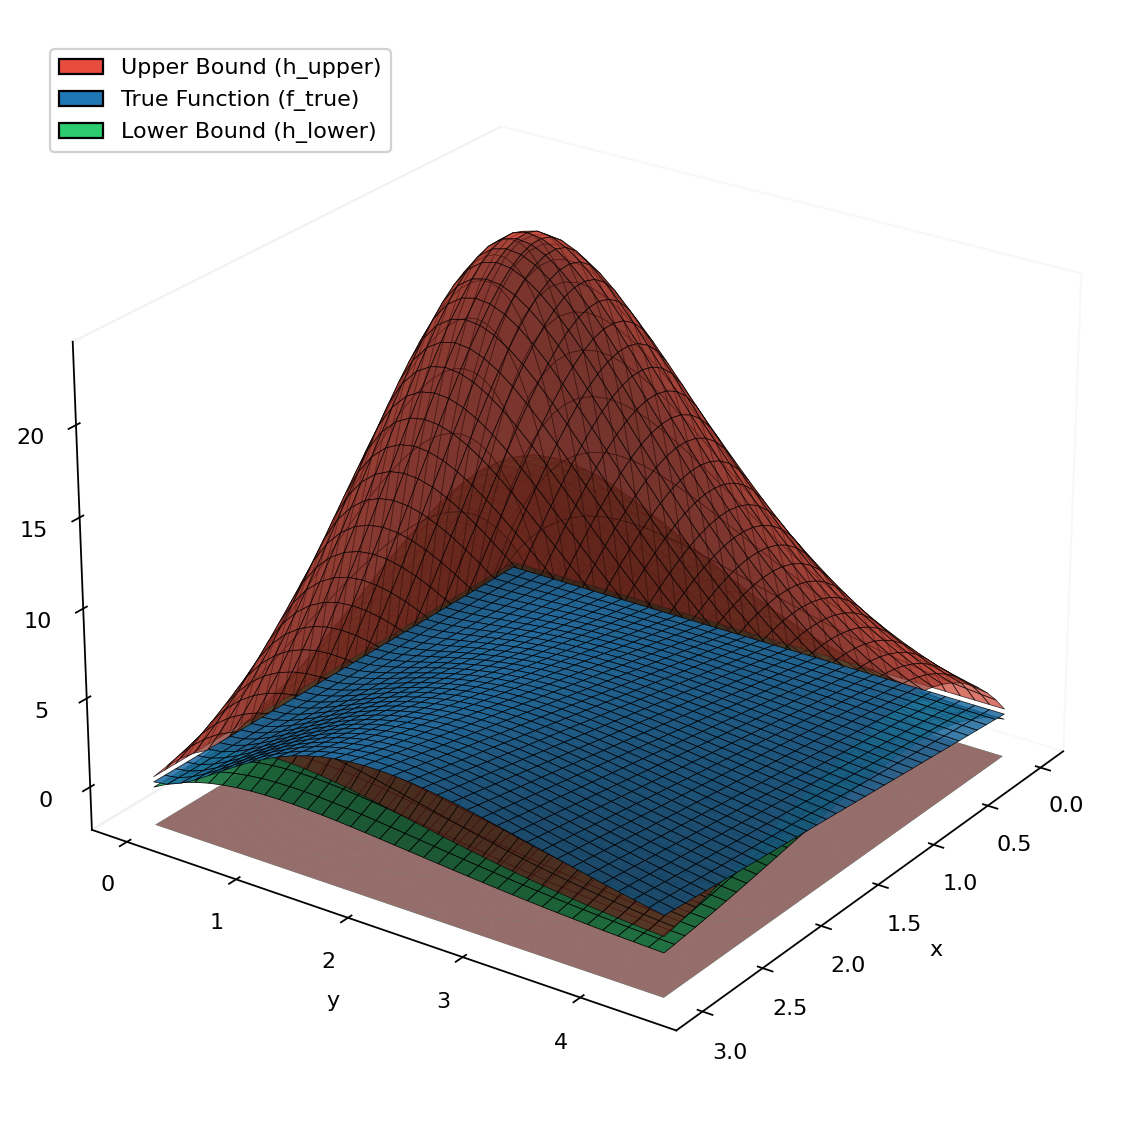

In [11]:
# -*- coding: utf-8 -*-
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from matplotlib.patches import Patch

# --- Functions ---
def f_true(x, y): return 3.0 * x * (y**2) * math.exp(-y)
def h_lower(x, y): return 2.0 * x * y * math.exp(-y)
def h_upper(x, y): return 4.0 * x * y * math.exp(-y)

def pq_int(n, p, q): return (p**n - q**n) / (p - q)

def pq_binom(n, k, p, q):
    num = 1.0; den = 1.0
    for i in range(1, k+1):
        num *= (p**(n-i+1) - q**(n-i+1))
        den *= (p**i - q**i)
    return num / den

def Phi(n, k, p, q, x, alpha_n):
    x_over_a = x / alpha_n
    prod = 1.0
    for s in range(n-k):
        prod *= (p**s - q**s * x_over_a)
    return (p**((k*(k-1) - n*(n-1))/2.0)) * pq_binom(n, k, p, q) * (x_over_a**k) * prod

def nodes_1d(n, p, q, alpha_n):
    denom = pq_int(n, p, q)
    return np.array([(pq_int(k, p, q)/denom) * (p**(k-n)) * alpha_n for k in range(n+1)])

def C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, x, y, h):
    xs = nodes_1d(n, p1, q1, alpha_n)
    ys = nodes_1d(m, p2, q2, beta_m)
    phi_x = np.array([Phi(n, k, p1, q1, x, alpha_n) for k in range(n+1)])
    phi_y = np.array([Phi(m, j, p2, q2, y, beta_m) for j in range(m+1)])
    total = 0.0
    for k in range(n+1):
        for j in range(m+1):
            total += h(xs[k], ys[j]) * phi_x[k] * phi_y[j]
    return total

# --- Parameters ---
n = m = 20
p1, q1 = 0.90, 0.86
p2, q2 = 0.996, 0.89
alpha_n = math.log(n)
beta_m  = math.sqrt(m)

# --- Grid & surfaces ---
Nx = Ny = 36
xs = np.linspace(0.0, alpha_n, Nx)
ys = np.linspace(0.0, beta_m, Ny)
X, Y = np.meshgrid(xs, ys)

Z_true = np.vectorize(f_true)(X, Y)
Z_op_lower = np.zeros_like(X, dtype=float)
Z_op_upper = np.zeros_like(X, dtype=float)

for i in range(Ny):
    for j in range(Nx):
        Z_op_lower[i, j] = C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, X[i, j], Y[i, j], h_lower)
        Z_op_upper[i, j] = C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, X[i, j], Y[i, j], h_upper)

# --- Visual offsets ---
z_min = float(np.nanmin([Z_true, Z_op_lower, Z_op_upper]))
z_max = float(np.nanmax([Z_true, Z_op_lower, Z_op_upper]))
eps    = 0.012 * (z_max - z_min) if z_max > z_min else 1e-6
z_floor = z_min - 0.10 * (z_max - z_min)

# --- Plot ---
plt.rcParams["figure.dpi"] = 160
fig = plt.figure(figsize=(9.2, 7.2))
ax = fig.add_subplot(111, projection='3d')

# Colors
c_true  = "#1f77b4"  # blue
c_lower = "#2ecc71"  # green
c_upper = "#e74c3c"  # red

# 1) Floor projections (constant color via `colors=[...]`, no .collections needed)
ax.contourf(X, Y, Z_op_lower, zdir='z', offset=z_floor, levels=10, colors=[c_lower], alpha=0.80, antialiased=True)
ax.contourf(X, Y, Z_true,     zdir='z', offset=z_floor, levels=10, colors=[c_true],  alpha=0.65, antialiased=True)
ax.contourf(X, Y, Z_op_upper, zdir='z', offset=z_floor, levels=10, colors=[c_upper], alpha=0.55, antialiased=True)

# 2) Surfaces (draw order: lower -> true -> upper)
ax.plot_surface(X, Y, Z_op_lower - eps, color=c_lower, alpha=0.95, linewidth=0.35, edgecolor="k", antialiased=True)
ax.plot_surface(X, Y, Z_true,           color=c_true,  alpha=0.85, linewidth=0.35, edgecolor="k", antialiased=True)
ax.plot_surface(X, Y, Z_op_upper + eps, color=c_upper, alpha=0.72, linewidth=0.35, edgecolor="k", antialiased=True)

# Labels & title
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('Value', fontsize=10)
#ax.set_title('True Function vs. Fuzzy Operator (Clear Layered View)', pad=10)

# Clean background
ax.xaxis.pane.set_facecolor((1,1,1,0))
ax.yaxis.pane.set_facecolor((1,1,1,0))
ax.zaxis.pane.set_facecolor((1,1,1,0))
ax.grid(False)

# Legend
legend_patches = [
    Patch(facecolor=c_upper, edgecolor='k', label='Upper Bound (h_upper)'),
    Patch(facecolor=c_true,  edgecolor='k', label='True Function (f_true)'),
    Patch(facecolor=c_lower, edgecolor='k', label='Lower Bound (h_lower)'),
]
leg = ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(0.02, 0.98), frameon=True)
leg.get_frame().set_alpha(0.9)

# Optional on-figure text
#ax.text2D(0.02, 0.92, "Upper Bound", transform=ax.transAxes, color=c_upper, fontsize=11, weight='bold')
#ax.text2D(0.02, 0.88, "True",        transform=ax.transAxes, color=c_true,  fontsize=11, weight='bold')
#ax.text2D(0.02, 0.84, "Lower Bound", transform=ax.transAxes, color=c_lower, fontsize=11, weight='bold')

# View & limits
ax.view_init(elev=25, azim=35)
ax.set_zlim(z_floor, z_max)

plt.tight_layout()
plt.savefig("fuzzy_operator_layers_explained_en.png", dpi=300, bbox_inches="tight")
plt.show()

#print("Saved: fuzzy_operator_layers_explained_en.png")


**35 Derece Döndürülmüs**

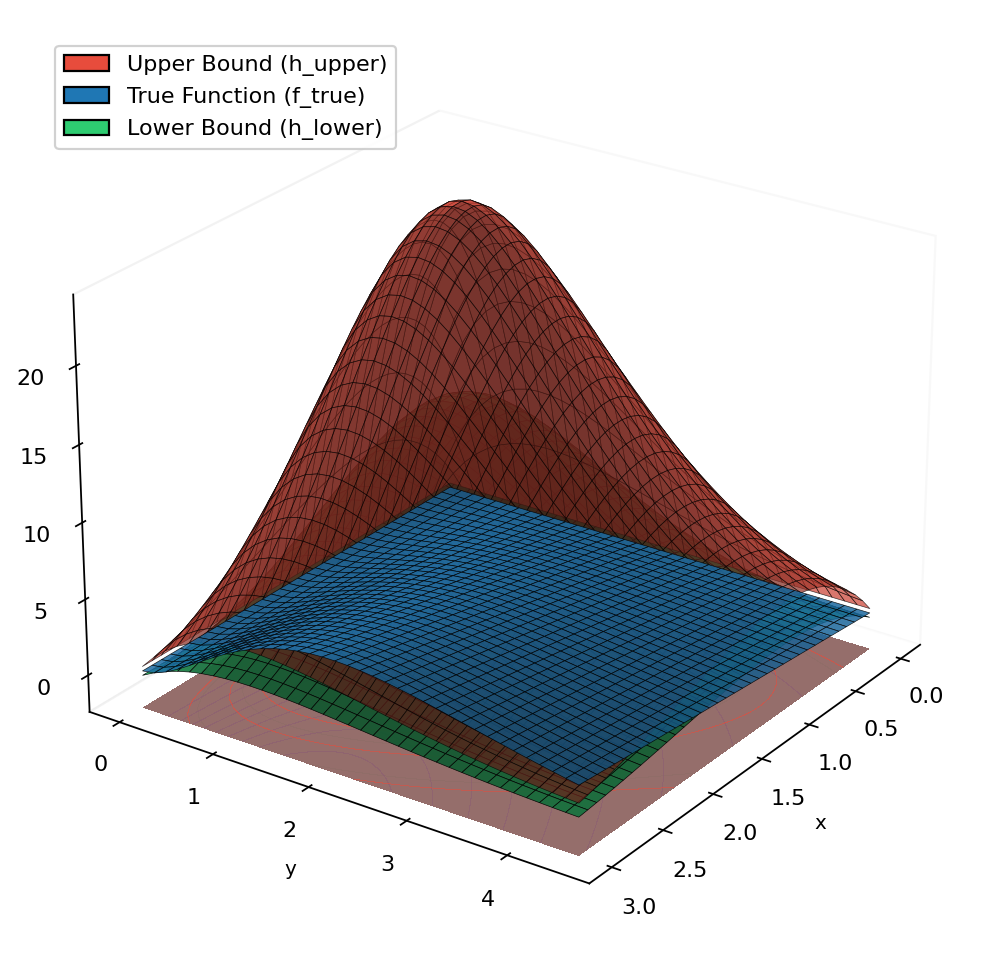

In [16]:
# Recreate the provided plot with improved aesthetics and smaller size
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch

# Functions
def f_true(x, y): return 3.0 * x * (y**2) * math.exp(-y)
def h_lower(x, y): return 2.0 * x * y * math.exp(-y)
def h_upper(x, y): return 4.0 * x * y * math.exp(-y)

def pq_int(n, p, q): return (p**n - q**n) / (p - q)

def pq_binom(n, k, p, q):
    num = 1.0; den = 1.0
    for i in range(1, k+1):
        num *= (p**(n-i+1) - q**(n-i+1))
        den *= (p**i - q**i)
    return num / den

def Phi(n, k, p, q, x, alpha_n):
    x_over_a = x / alpha_n
    prod = 1.0
    for s in range(n-k):
        prod *= (p**s - q**s * x_over_a)
    return (p**((k*(k-1) - n*(n-1))/2.0)) * pq_binom(n, k, p, q) * (x_over_a**k) * prod

def nodes_1d(n, p, q, alpha_n):
    denom = pq_int(n, p, q)
    return np.array([(pq_int(k, p, q)/denom) * (p**(k-n)) * alpha_n for k in range(n+1)])

def C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, x, y, h):
    xs = nodes_1d(n, p1, q1, alpha_n)
    ys = nodes_1d(m, p2, q2, beta_m)
    phi_x = np.array([Phi(n, k, p1, q1, x, alpha_n) for k in range(n+1)])
    phi_y = np.array([Phi(m, j, p2, q2, y, beta_m) for j in range(m+1)])
    total = 0.0
    for k in range(n+1):
        for j in range(m+1):
            total += h(xs[k], ys[j]) * phi_x[k] * phi_y[j]
    return total

# Parameters
n = m = 20
p1, q1 = 0.90, 0.86
p2, q2 = 0.996, 0.89
alpha_n = math.log(n)
beta_m  = math.sqrt(m)

# Grid & surfaces
Nx = Ny = 36
xs = np.linspace(0.0, alpha_n, Nx)
ys = np.linspace(0.0, beta_m, Ny)
X, Y = np.meshgrid(xs, ys)

Z_true = np.vectorize(f_true)(X, Y)
Z_op_lower = np.zeros_like(X, dtype=float)
Z_op_upper = np.zeros_like(X, dtype=float)

for i in range(Ny):
    for j in range(Nx):
        Z_op_lower[i, j] = C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, X[i, j], Y[i, j], h_lower)
        Z_op_upper[i, j] = C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, X[i, j], Y[i, j], h_upper)

# Visual offsets
z_min = float(np.nanmin([Z_true, Z_op_lower, Z_op_upper]))
z_max = float(np.nanmax([Z_true, Z_op_lower, Z_op_upper]))
eps = 0.012 * (z_max - z_min) if z_max > z_min else 1e-6
z_floor = z_min - 0.10 * (z_max - z_min)

# Plot
plt.rcParams["figure.dpi"] = 160
fig = plt.figure(figsize=(7.5, 6.2))  # Smaller and more elegant
ax = fig.add_subplot(111, projection='3d')

# Colors
c_true = "#1f77b4"
c_lower = "#2ecc71"
c_upper = "#e74c3c"

# Floor projections
ax.contourf(X, Y, Z_op_lower, zdir='z', offset=z_floor, levels=10, colors=[c_lower], alpha=0.80)
ax.contourf(X, Y, Z_true,     zdir='z', offset=z_floor, levels=10, colors=[c_true],  alpha=0.65)
ax.contourf(X, Y, Z_op_upper, zdir='z', offset=z_floor, levels=10, colors=[c_upper], alpha=0.55)

# Surfaces
ax.plot_surface(X, Y, Z_op_lower - eps, color=c_lower, alpha=0.95, linewidth=0.3, edgecolor="k")
ax.plot_surface(X, Y, Z_true,           color=c_true,  alpha=0.85, linewidth=0.3, edgecolor="k")
ax.plot_surface(X, Y, Z_op_upper + eps, color=c_upper, alpha=0.72, linewidth=0.3, edgecolor="k")

# Labels
ax.set_xlabel('x', fontsize=9)
ax.set_ylabel('y', fontsize=9)
ax.set_zlabel('Value', fontsize=9)

# Clean background
ax.xaxis.pane.set_facecolor((1,1,1,0))
ax.yaxis.pane.set_facecolor((1,1,1,0))
ax.zaxis.pane.set_facecolor((1,1,1,0))
ax.grid(False)

# Legend
legend_patches = [
    Patch(facecolor=c_upper, edgecolor='k', label='Upper Bound (h_upper)'),
    Patch(facecolor=c_true,  edgecolor='k', label='True Function (f_true)'),
    Patch(facecolor=c_lower, edgecolor='k', label='Lower Bound (h_lower)'),
]
leg = ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(0.02, 0.98), frameon=True)
leg.get_frame().set_alpha(0.9)

# View & limits
ax.view_init(elev=25, azim=35)
ax.set_zlim(z_floor, z_max)

plt.tight_layout()
plt.show()


**125 Derece Döndürülmüs**

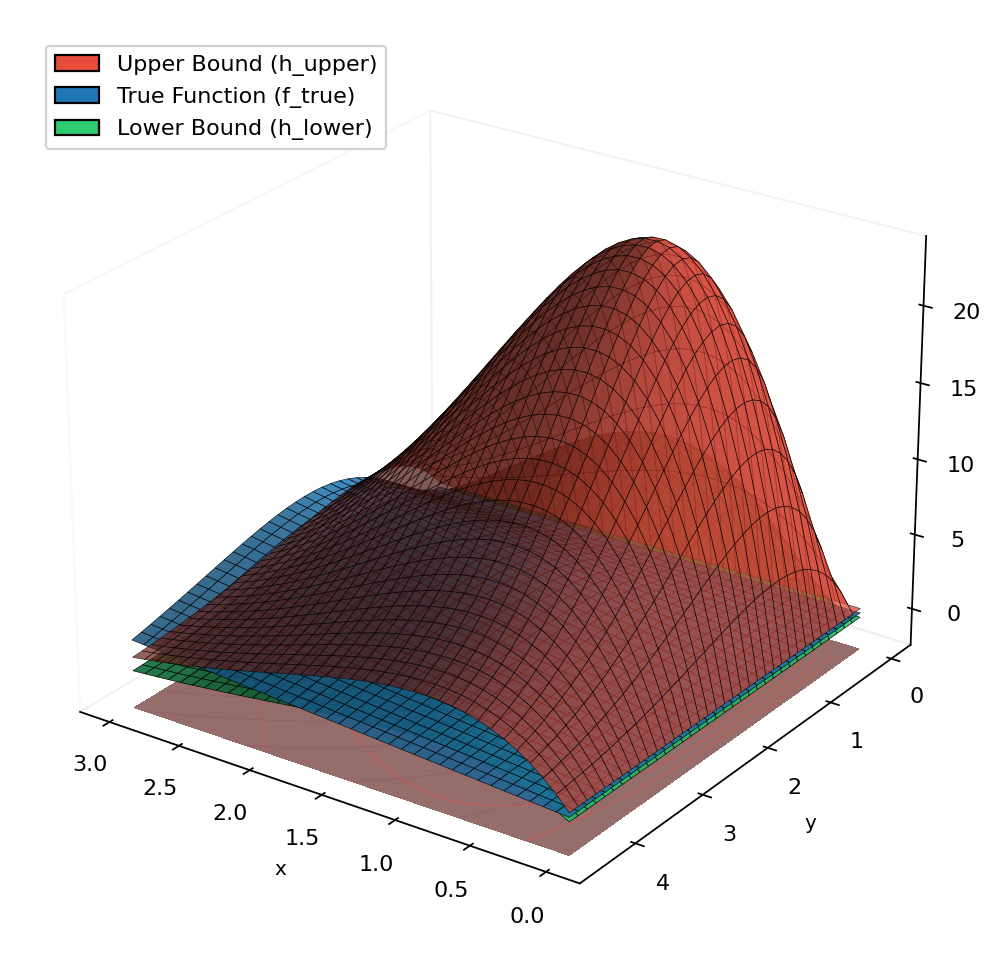

In [17]:
# Recreate the provided plot with improved aesthetics and smaller size
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch

# Functions
def f_true(x, y): return 3.0 * x * (y**2) * math.exp(-y)
def h_lower(x, y): return 2.0 * x * y * math.exp(-y)
def h_upper(x, y): return 4.0 * x * y * math.exp(-y)

def pq_int(n, p, q): return (p**n - q**n) / (p - q)

def pq_binom(n, k, p, q):
    num = 1.0; den = 1.0
    for i in range(1, k+1):
        num *= (p**(n-i+1) - q**(n-i+1))
        den *= (p**i - q**i)
    return num / den

def Phi(n, k, p, q, x, alpha_n):
    x_over_a = x / alpha_n
    prod = 1.0
    for s in range(n-k):
        prod *= (p**s - q**s * x_over_a)
    return (p**((k*(k-1) - n*(n-1))/2.0)) * pq_binom(n, k, p, q) * (x_over_a**k) * prod

def nodes_1d(n, p, q, alpha_n):
    denom = pq_int(n, p, q)
    return np.array([(pq_int(k, p, q)/denom) * (p**(k-n)) * alpha_n for k in range(n+1)])

def C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, x, y, h):
    xs = nodes_1d(n, p1, q1, alpha_n)
    ys = nodes_1d(m, p2, q2, beta_m)
    phi_x = np.array([Phi(n, k, p1, q1, x, alpha_n) for k in range(n+1)])
    phi_y = np.array([Phi(m, j, p2, q2, y, beta_m) for j in range(m+1)])
    total = 0.0
    for k in range(n+1):
        for j in range(m+1):
            total += h(xs[k], ys[j]) * phi_x[k] * phi_y[j]
    return total

# Parameters
n = m = 20
p1, q1 = 0.90, 0.86
p2, q2 = 0.996, 0.89
alpha_n = math.log(n)
beta_m  = math.sqrt(m)

# Grid & surfaces
Nx = Ny = 36
xs = np.linspace(0.0, alpha_n, Nx)
ys = np.linspace(0.0, beta_m, Ny)
X, Y = np.meshgrid(xs, ys)

Z_true = np.vectorize(f_true)(X, Y)
Z_op_lower = np.zeros_like(X, dtype=float)
Z_op_upper = np.zeros_like(X, dtype=float)

for i in range(Ny):
    for j in range(Nx):
        Z_op_lower[i, j] = C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, X[i, j], Y[i, j], h_lower)
        Z_op_upper[i, j] = C_F_nm_apply(n, m, p1, q1, p2, q2, alpha_n, beta_m, X[i, j], Y[i, j], h_upper)

# Visual offsets
z_min = float(np.nanmin([Z_true, Z_op_lower, Z_op_upper]))
z_max = float(np.nanmax([Z_true, Z_op_lower, Z_op_upper]))
eps = 0.012 * (z_max - z_min) if z_max > z_min else 1e-6
z_floor = z_min - 0.10 * (z_max - z_min)

# Plot
plt.rcParams["figure.dpi"] = 160
fig = plt.figure(figsize=(7.5, 6.2))  # Smaller and more elegant
ax = fig.add_subplot(111, projection='3d')

# Colors
c_true = "#1f77b4"
c_lower = "#2ecc71"
c_upper = "#e74c3c"

# Floor projections
ax.contourf(X, Y, Z_op_lower, zdir='z', offset=z_floor, levels=10, colors=[c_lower], alpha=0.80)
ax.contourf(X, Y, Z_true,     zdir='z', offset=z_floor, levels=10, colors=[c_true],  alpha=0.65)
ax.contourf(X, Y, Z_op_upper, zdir='z', offset=z_floor, levels=10, colors=[c_upper], alpha=0.55)

# Surfaces
ax.plot_surface(X, Y, Z_op_lower - eps, color=c_lower, alpha=0.95, linewidth=0.3, edgecolor="k")
ax.plot_surface(X, Y, Z_true,           color=c_true,  alpha=0.85, linewidth=0.3, edgecolor="k")
ax.plot_surface(X, Y, Z_op_upper + eps, color=c_upper, alpha=0.72, linewidth=0.3, edgecolor="k")

# Labels
ax.set_xlabel('x', fontsize=9)
ax.set_ylabel('y', fontsize=9)
ax.set_zlabel('Value', fontsize=9)

# Clean background
ax.xaxis.pane.set_facecolor((1,1,1,0))
ax.yaxis.pane.set_facecolor((1,1,1,0))
ax.zaxis.pane.set_facecolor((1,1,1,0))
ax.grid(False)

# Legend
legend_patches = [
    Patch(facecolor=c_upper, edgecolor='k', label='Upper Bound (h_upper)'),
    Patch(facecolor=c_true,  edgecolor='k', label='True Function (f_true)'),
    Patch(facecolor=c_lower, edgecolor='k', label='Lower Bound (h_lower)'),
]
leg = ax.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(0.02, 0.98), frameon=True)
leg.get_frame().set_alpha(0.9)

# View & limits
ax.view_init(elev=25, azim=125)
ax.set_zlim(z_floor, z_max)

plt.tight_layout()
plt.show()
